In [22]:
import pandas as pd
from pathlib import Path
from PIL import Image

from torch.utils.data import DataLoader

from iris.data import LandMarkDataset, labels

In [23]:
anotations = pd.read_csv(str(Path.cwd().parent / "img_metadata_train_dev.csv"))
land_mark_dataset_medellin = LandMarkDataset(str(Path.cwd().parent / "dataset/train"), anotations)
train_dataloader = DataLoader(land_mark_dataset_medellin, batch_size=8, shuffle=True)

In [44]:
features, pred_labels = next(iter(train_dataloader))
print(f"Number of images and shape {features.shape} with its labels {len(labels)}")

Number of images and shape torch.Size([8, 3, 400, 600]) with its labels 21


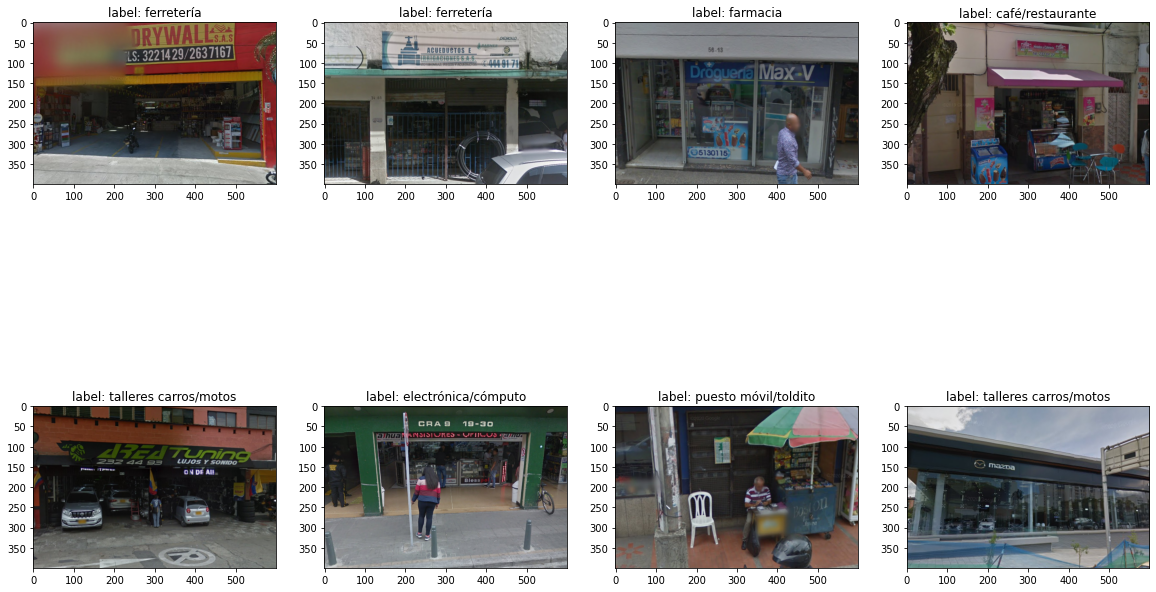

In [45]:
from torchvision import transforms
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
columns = 4
for i, image in enumerate(features):
    image = transforms.ToPILImage()(image).convert("RGB")
    plt.subplot(int(len(features) / columns + 1), columns, i + 1)
    plt.imshow(image)
    plt.title(f"label: {labels[pred_labels[i]]}")